load data finish
load data time used:7.347898
dimensionality reduction...
finish!


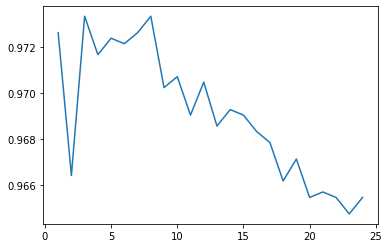

In [3]:
import os.path
import csv
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data_dir = 'C:/Users/31661/Desktop'

def searchBestPar(trainX,trainY,testX,testY):
    bestScore=0
    bestK=-1
    bestWeight=""
    # weight==uniform时
    for k in range(1,10):
        clf = KNeighborsClassifier(n_neighbors=k,weights="uniform")
        clf.fit(trainX,trainY)
        scor=clf.score(testX,testY)
        if scor > bestScore:
            bestScore=scor
            bestK=k
            bestWeight="uniform"
    # weight==distance时
    for k in range(1,10):
        for p in range(1,7):
            clf=KNeighborsClassifier(n_neighbors=k,weights="distance",p=p)
            clf.fit(trainX,trainY)
            scor = clf.score(testX, testY)
            if scor > bestScore:
                bestScore = scor
                bestK = k
                bestWeight = "distance"
 
    print("the best n_neighbors", bestK)
    print("the best weights", bestWeight)
    print("the best p", p)


# 加载数据
def opencsv():
    # 使用 pandas 打开
    data = pd.read_csv(os.path.join(data_dir, 'train.csv'))
    data1 = pd.read_csv(os.path.join(data_dir, 'test.csv'))

    train_data = data.values[0:, 1:]  # 读入全部训练数据,  [行，列]
    train_label = data.values[0:, 0]  # 读取列表的第一列
    test_data = data1.values[0:, 0:]  # 测试全部测试个数据
    return train_data, train_label, test_data


def saveResult(result, csvName):
    with open(csvName, 'w',newline='') as myFile:  # 创建记录输出结果的文件（w 和 wb 使用的时候有问题）
        # python3里面对 str和bytes类型做了严格的区分，不像python2里面某些函数里可以混用。所以用python3来写wirterow时，打开文件不要用wb模式，只需要使用w模式，然后带上newline=''
        myWriter = csv.writer(myFile)
        myWriter.writerow(["ImageId", "Label"])
        index = 0
        for r in result:
            index += 1
            myWriter.writerow([index, int(r)])
    print('Saved successfully...')  # 保存预测结果


def knnClassify(trainData, trainLabel):
    """
    score = []
    krange=range(10,20) # K值取值范围
    for i in krange:
      clf=KNeighborsClassifier(n_neighbors=i)
      clf=clf.fit(trainData, trainLabel)
      score.append(clf.score(trainData, trainLabel))
    plt.plot(krange, score)
    """
    knnClf = KNeighborsClassifier(n_neighbors=1)  # default:k = 5,defined by yourself:KNeighborsClassifier(n_neighbors=10)
    knnClf.fit(trainData, np.ravel(trainLabel))  # ravel Return a contiguous flattened array.
    #print('%.8f' % knnClf.score(trainData, trainLabel))
    return knnClf


# 数据预处理-降维 PCA主成成分分析
def dRPCA(x_train, x_test, COMPONENT_NUM):
    print('dimensionality reduction...')
    trainData = np.array(x_train)
    testData = np.array(x_test)
    '''
    使用说明：https://www.cnblogs.com/pinard/p/6243025.html
    n_components>=1
      n_components=NUM   设置占特征数量比
    0 < n_components < 1
      n_components=0.99  设置阈值总方差占比
    '''
    pca = PCA(n_components=COMPONENT_NUM, whiten=False)
    pca.fit(trainData)  # Fit the model with X
    pcaTrainData = pca.transform(trainData)  # Fit the model with X and 在X上完成降维.
    pcaTestData = pca.transform(testData)  # Fit the model with X and 在X上完成降维.

    # pca 方差大小、方差占比、特征数量
    #print(pca.explained_variance_, '\n', pca.explained_variance_ratio_, '\n',
          #pca.n_components_)
    #print(sum(pca.explained_variance_ratio_))
    return pcaTrainData, pcaTestData


def dRecognition_knn():
    start_time = time.time()

    # 加载数据
    trainData, trainLabel, testData = opencsv()
    # print("trainData==>", type(trainData), shape(trainData))
    # print("trainLabel==>", type(trainLabel), shape(trainLabel))
    # print("testData==>", type(testData), shape(testData))
    print("load data finish")
    stop_time_l = time.time()
    print('load data time used:%f' % (stop_time_l - start_time))

    # 降维处理
    trainData, testData = dRPCA(trainData, testData, 0.8)
    x_train, x_test, y_train, y_test = train_test_split(trainData, trainLabel, test_size=0.1)
    print("finish!")
    searchBestPar(x_train, y_train,x_test, y_test)
    stop_time_r = time.time()
    print('classify time used:%f' % (stop_time_r - start_time))

def dRecognition_knn1():
    start_time = time.time()

    # 加载数据
    trainData, trainLabel, testData = opencsv()
    # print("trainData==>", type(trainData), shape(trainData))
    # print("trainLabel==>", type(trainLabel), shape(trainLabel))
    # print("testData==>", type(testData), shape(testData))
    print("load data finish")
    stop_time_l = time.time()
    print('load data time used:%f' % (stop_time_l - start_time))

    # 降维处理
    trainData, testData = dRPCA(trainData, testData, 0.8)
    x_train, x_test, y_train, y_test = train_test_split(trainData, trainLabel, test_size=0.1)
    
    print("finish!")
    stop_time_r = time.time()
     # 模型训练
    clf=KNeighborsClassifier(n_neighbors=8,weights='distance',p=6)
    clf.fit(x_train, np.ravel(y_train))
    # 结果预测
    testLabel = clf.predict(testData)

    # 结果的输出
    saveResult(testLabel, os.path.join(data_dir, 'output/Result_sklearn_knn.csv'))
    target_names = [str(i) for i in list(set(y_test))]
    print(target_names)
    print(classification_report(y_test, clf.predict(x_test), target_names=target_names))
    print('time used:%f' % (stop_time_r - start_time))
    
    score = []
    krange=range(1,10) # K值取值范围
    for i in krange:
      clf=KNeighborsClassifier(n_neighbors=i)
      clf=clf.fit(trainData, trainLabel)
      score.append(clf.score(x_test, y_test))
    plt.plot(krange, score)

def draw():
    start_time = time.time()

    # 加载数据
    trainData, trainLabel, testData = opencsv()
    # print("trainData==>", type(trainData), shape(trainData))
    # print("trainLabel==>", type(trainLabel), shape(trainLabel))
    # print("testData==>", type(testData), shape(testData))
    print("load data finish")
    stop_time_l = time.time()
    print('load data time used:%f' % (stop_time_l - start_time))

    # 降维处理
    trainData, testData = dRPCA(trainData, testData, 0.8)
    x_train, x_test, y_train, y_test = train_test_split(trainData, trainLabel, test_size=0.1)
    score = []
    krange=range(1,25) # K值取值范围
    for i in krange:
      clf=KNeighborsClassifier(n_neighbors=i)
      clf=clf.fit(x_train, y_train)
      score.append(clf.score(x_test, y_test))
    plt.plot(krange, score)
    print("finish!")
    
#dRecognition_knn()
#dRecognition_knn1()
draw()

In [5]:
#!/usr/bin/python3
# coding: utf-8

'''
Created on 2017-10-26
Update  on 2017-10-26
Author: 片刻
Github: https://github.com/apachecn/kaggle
'''

import os.path
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 数据路径
data_dir = 'C:/Users/31661/Desktop'


# 加载数据
def opencsv():
    print('Load Data...')
    # 使用 pandas 打开
    dataTrain = pd.read_csv(os.path.join(data_dir, 'train.csv'))
    dataPre = pd.read_csv(os.path.join(data_dir, 'test.csv'))
    trainData = dataTrain.values[:, 1:]  # 读入全部训练数据
    trainLabel = dataTrain.values[:, 0]
    preData = dataPre.values[:, :]  # 测试全部测试个数据
    return trainData, trainLabel, preData


# 数据预处理-降维 PCA主成成分分析
def dRCsv(x_train, x_test, preData, COMPONENT_NUM):
    print('dimensionality reduction...')
    trainData = np.array(x_train)
    testData = np.array(x_test)
    preData = np.array(preData)

    '''
    使用说明：https://www.cnblogs.com/pinard/p/6243025.html
    n_components>=1
      n_components=NUM   设置占特征数量比
    0 < n_components < 1
      n_components=0.99  设置阈值总方差占比
    '''
    pca = PCA(n_components=COMPONENT_NUM, whiten=True)
    pca.fit(trainData)  # Fit the model with X
    pcaTrainData = pca.transform(trainData)  # Fit the model with X and 在X上完成降维.
    pcaTestData = pca.transform(testData)  # Fit the model with X and 在X上完成降维.
    pcaPreData = pca.transform(preData)  # Fit the model with X and 在X上完成降维.

    # pca 方差大小、方差占比、特征数量
    #print(pca.explained_variance_, '\n', pca.explained_variance_ratio_, '\n', pca.n_components_)
    #print(sum(pca.explained_variance_ratio_))
    return pcaTrainData,  pcaTestData, pcaPreData


# 训练模型
def trainModel(trainData, trainLabel):
    print('Train SVM...')
    svmClf = SVC(C=4, kernel='rbf')
    svmClf.fit(trainData, trainLabel)  # 训练SVM
    return svmClf


# 结果输出保存
def saveResult(result, csvName):
    with open(csvName, 'w') as myFile:
        myWriter = csv.writer(myFile)
        myWriter.writerow(["ImageId", "Label"])
        index = 0
        for r in result:
            index += 1
            myWriter.writerow([index, int(r)])
    print('Saved successfully...')  # 保存预测结果


# 分析数据,看数据是否满足要求（通过这些来检测数据的相关性，考虑在分类的时候提取出重要的特征）
def analyse_data(dataMat):
    meanVals = np.mean(dataMat, axis=0)  # np.mean 求出每列的平均值meanVals
    meanRemoved = dataMat-meanVals  # 每一列特征值减去该列的特征值均值
    # 计算协方差矩阵，除数n-1是为了得到协方差的 无偏估计
    # cov(X,0) = cov(X) 除数是n-1(n为样本个数)
    # cov(X,1) 除数是n
    covMat = np.cov(meanRemoved, rowvar=0)  # cov 计算协方差的值,
    # np.mat 是用来生成一个矩阵的
    # 保存特征值(eigvals)和对应的特征向量(eigVects)
    eigvals, eigVects = np.linalg.eig(np.mat(covMat))  # linalg.eig 计算的值是矩阵的特征值，保存在对应的矩阵中
    eigValInd = np.argsort(eigvals)  # argsort 对特征值进行排序，返回的是数值从小到大的索引值

    topNfeat = 100  # 需要保留的特征维度，即要压缩成的维度数

    # 从排序后的矩阵最后一个开始自下而上选取最大的N个特征值，返回其对应的索引
    eigValInd = eigValInd[:-(topNfeat+1):-1]

    # 计算特征值的总和
    cov_all_score = float(sum(eigvals))
    sum_cov_score = 0
    for i in range(0, len(eigValInd)):
        # 特征值进行相加
        line_cov_score = float(eigvals[eigValInd[i]])
        sum_cov_score += line_cov_score
        '''
        我们发现其中有超过20%的特征值都是0。
        这就意味着这些特征都是其他特征的副本，也就是说，它们可以通过其他特征来表示，而本身并没有提供额外的信息。
        最前面15个值的数量级大于10^5，实际上那以后的值都变得非常小。
        这就相当于告诉我们只有部分重要特征，重要特征的数目也很快就会下降。
        最后，我们可能会注意到有一些小的负值，他们主要源自数值误差应该四舍五入成0.
        '''
        print('主成分：%s, 方差占比：%s%%, 累积方差占比：%s%%' % (format(i+1, '2.0f'), format(line_cov_score/cov_all_score*100, '4.2f'), format(sum_cov_score/cov_all_score*100, '4.1f')))


# 找出最高准确率
def getOptimalAccuracy(trainData, trainLabel, preData):
    # 分析数据 100个特征左右
    # analyse_data(trainData)
    x_train, x_test, y_train, y_test = train_test_split(trainData, trainLabel, test_size=0.1)
    lineLen, featureLen = np.shape(x_test) # shape 返回矩阵或者数值的长度
    print(lineLen, type(lineLen), featureLen, type(featureLen))

    minErr = 1
    minSumErr = 0
    optimalNum = 1
    optimalLabel = []
    optimalSVMClf = None
    pcaPreDataResult = None
    for i in range(34, 36, 1):
        # 评估训练结果
        pcaTrainData,  pcaTestData, pcaPreData = dRCsv(x_train, x_test, preData, i)
        svmClf = trainModel(pcaTrainData, y_train)
        svmtestLabel = svmClf.predict(pcaTestData)

        errArr = np.mat(np.ones((lineLen, 1)))
        sumErrArr = errArr[svmtestLabel != y_test].sum()
        sumErr = sumErrArr/lineLen

        print('i=%s' % i, lineLen, sumErrArr, sumErr)
        if sumErr <= minErr:
            minErr = sumErr
            minSumErr = sumErrArr
            optimalNum = i
            optimalSVMClf = svmClf
            optimalLabel = svmtestLabel
            pcaPreDataResult = pcaPreData
            print("i=%s >>>>> \t" % i, int(minSumErr), minErr)

    '''
    展现 准确率与召回率
        precision 准确率
        recall 召回率
        f1-score  准确率和召回率的一个综合得分
        support 参与比较的数量
    参考链接：http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
    '''

    # target_names 以 y的label分类为准
    # target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    target_names = [str(i) for i in list(set(y_test))]
    print(target_names)
    print(classification_report(y_test, optimalLabel, target_names=target_names))
    print("特征数量= %s, 存在最优解：>>> \t" % optimalNum, int(minSumErr), 1-minErr)
    return optimalSVMClf, pcaPreDataResult


# 存储模型
def storeModel(model, filename):
    import pickle
    with open(filename, 'wb') as fw:
        pickle.dump(model, fw)


# 加载模型
def getModel(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)


def trainDRSVM():
    startTime = time.time()

    # 加载数据
    trainData, trainLabel, preData = opencsv()
    # 模型训练 (数据预处理-降维)
    optimalSVMClf, pcaPreData = getOptimalAccuracy(trainData, trainLabel, preData)

    storeModel(optimalSVMClf, os.path.join(data_dir, 'output/Result_sklearn_SVM.model'))
    storeModel(pcaPreData, os.path.join(data_dir, 'output/Result_sklearn_SVM.pcaPreData'))

    print("finish!")
    stopTime = time.time()
    print('TrainModel store time used:%f s' % (stopTime - startTime))


def preDRSVM():
    startTime = time.time()
    # 加载模型和数据
    optimalSVMClf = getModel(os.path.join(data_dir, 'output/Result_sklearn_SVM.model'))
    pcaPreData = getModel(os.path.join(data_dir, 'output/Result_sklearn_SVM.pcaPreData'))

    # 结果预测
    testLabel = optimalSVMClf.predict(pcaPreData)
    # print("testLabel = %f" % testscore)
    # 结果的输出
    saveResult(testLabel, os.path.join(data_dir, 'output/Result_sklearn_SVM.csv'))
    print("finish!")
    stopTime = time.time()
    print('PreModel load time used:%f s' % (stopTime - startTime))


# 数据可视化
def dataVisulization(data, labels):
    pca = PCA(n_components=2, whiten=True) # 使用PCA方法降到2维
    pca.fit(data)
    pcaData = pca.transform(data)
    uniqueClasses = set(labels)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for cClass in uniqueClasses:
        plt.scatter(pcaData[labels==cClass, 0], pcaData[labels==cClass, 1])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('MNIST visualization')
    plt.show()


if __name__ == '__main__':
    trainData, trainLabel, preData = opencsv()
    #dataVisulization(trainData, trainLabel)


    # 训练并保存模型
    trainDRSVM()

    # 分析数据
    #analyse_data(trainData)
    # 加载预测数据集
    #preDRSVM()

Load Data...
Load Data...
4200 <class 'int'> 784 <class 'int'>
dimensionality reduction...
Train SVM...
i=34 4200 79.0 0.01880952380952381
i=34 >>>>> 	 79 0.9811904761904762
dimensionality reduction...
Train SVM...
i=35 4200 85.0 0.02023809523809524
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       392
           1       0.99      0.99      0.99       485
           2       0.98      0.99      0.99       429
           3       0.97      0.97      0.97       419
           4       0.98      0.98      0.98       405
           5       0.98      0.97      0.98       383
           6       0.99      0.99      0.99       425
           7       0.98      0.98      0.98       435
           8       0.98      0.97      0.97       405
           9       0.98      0.97      0.97       422

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      

In [2]:
#!/usr/bin/python
# coding: utf-8
'''
Created on 2018-05-14
Update  on 2018-05-19
Author: 平淡的天/wang-sw
Github: https://github.com/apachecn/kaggle
'''
import os.path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from numpy import arange
from lightgbm import LGBMClassifier
import os.path
import time
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 数据路径
data_dir = 'C:/Users/31661/Desktop'

# 加载数据
def opencsv():
    # 使用 pandas 打开
    train_data = pd.read_csv(os.path.join(data_dir, 'train.csv'))
    test_data = pd.read_csv(os.path.join(data_dir, 'test.csv'))
    data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
    data.drop(['label'], axis=1, inplace=True)
    label = train_data.label
    return train_data,test_data,data, label

# 数据预处理-降维 PCA主成成分分析
def dRPCA(data, COMPONENT_NUM=100):
    print('dimensionality reduction...')
    data = np.array(data)
    '''
    使用说明：https://www.cnblogs.com/pinard/p/6243025.html
    n_components>=1
      n_components=NUM   设置占特征数量
    0 < n_components < 1
      n_components=0.99  设置阈值总方差占比
    '''
    pca = PCA(n_components=COMPONENT_NUM, random_state=34)
    data_pca = pca.fit_transform(data)

    # pca 方差大小、方差占比、特征数量
    #print(pca.explained_variance_, '\n', pca.explained_variance_ratio_, '\n',
     #     pca.n_components_)
    #print(sum(pca.explained_variance_ratio_))
    storeModel(data_pca, os.path.join(data_dir, 'output/Result_sklearn_rf.pcaData'))
    return data_pca


# 训练模型
def trainModel(X_train, y_train):
    print('Train RF...')
    """
    clf = RandomForestClassifier(
        n_estimators=10,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=34)
    clf.fit(X_train, y_train)  # 训练rf
    """
    clf=LGBMClassifier(num_leaves=63, max_depth=7, n_estimators=80, n_jobs=20)
    
    param_test1 = {'n_estimators':arange(10,100,10),'max_depth':arange(5,15,1)}
    gsearch1 = GridSearchCV(estimator = clf, param_grid = param_test1, scoring='accuracy',iid=False,cv=5)
    gsearch1.fit(X_train, y_train)
    print(gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_)
    clf=gsearch1.best_estimator_

    return clf


# 计算准确率
def printAccuracy(y_test ,y_predict):
    zeroLable = y_test - y_predict
    rightCount = 0
    for i in range(len(zeroLable)):
        if list(zeroLable)[i] == 0:
            rightCount += 1
    print('the right rate is:', float(rightCount) / len(zeroLable))

# 存储模型
def storeModel(model, filename):
    import pickle
    with open(filename, 'wb') as fw:
        pickle.dump(model, fw)

# 加载模型
def getModel(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)

# 结果输出保存
def saveResult(result, csvName):
    i = 0
    n = len(result)
    print('the size of test set is {}'.format(n))
    with open(os.path.join(data_dir, 'output/Result_sklearn_RF.csv'), 'w') as fw:
        fw.write('{},{}\n'.format('ImageId', 'Label'))
        for i in range(1, n + 1):
            fw.write('{},{}\n'.format(i, result[i - 1]))
    print('Result saved successfully... and the path = {}'.format(csvName))


def trainRF():
    start_time = time.time()
    # 加载数据
    train_data, test_data, data, label = opencsv()
    print("load data finish")
    stop_time_l = time.time()
    print('load data time used:%f s' % (stop_time_l - start_time))

    startTime = time.time()
    # 模型训练 (数据预处理-降维)
    data_pca = dRPCA(data,100)

    X_train, X_test, y_train, y_test = train_test_split(
        data_pca[0:len(train_data)], label, test_size=0.1, random_state=34)

    rfClf = trainModel(X_train, y_train)

    # 保存结果
    storeModel(data_pca[len(train_data):], os.path.join(data_dir, 'output/Result_sklearn_rf.pcaPreData'))
    storeModel(rfClf, os.path.join(data_dir, 'output/Result_sklearn_rf.model'))

    # 模型准确率
    y_predict = rfClf.predict(X_test)
    target_names = [str(i) for i in list(set(y_test))]
    print(target_names)
    print(classification_report(y_test, rfClf.predict(X_test), target_names=target_names))

    print("finish!")
    stopTime = time.time()
    print('TrainModel store time used:%f s' % (stopTime - startTime))


def preRF():
    startTime = time.time()
    # 加载模型和数据
    clf=getModel(os.path.join(data_dir, 'output/Result_sklearn_rf.model'))
    pcaPreData = getModel(os.path.join(data_dir, 'output/Result_sklearn_rf.pcaPreData'))

    # 结果预测
    result = clf.predict(pcaPreData)

    # 结果的输出
    saveResult(result, os.path.join(data_dir, 'output/Result_sklearn_rf.csv'))
    print("finish!")
    stopTime = time.time()
    print('PreModel load time used:%f s' % (stopTime - startTime))


if __name__ == '__main__':

    # 训练并保存模型
    trainRF()

    # 加载预测数据集
    # preRF()

load data finish
load data time used:6.281361 s
dimensionality reduction...
Train RF...


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'mean_fit_time': array([ 1.3236083 ,  2.2116405 ,  2.70329595,  3.45116973,  4.2016149 ,
        5.04215031,  5.7330337 ,  6.48978457,  7.2189486 ,  1.44816504,
        2.71699276,  3.8646945 ,  5.58304157,  6.2677949 ,  7.5959991 ,
        8.48667974,  9.63939714, 10.84035425,  1.77792969,  3.34390612,
        5.23585744,  6.54464817,  8.04935031,  9.46825786, 11.06848745,
       12.65843534, 14.45524397,  1.72740135,  3.53014526,  5.31327004,
        6.65447989,  8.66771154, 10.56795835, 12.84151993, 13.34200253,
       15.89447265,  2.05190535,  3.83630815,  5.64033365,  7.43191433,
        9.41895633, 11.44716287, 13.4671659 , 15.3795773 , 16.96012444,
        2.06522589,  4.02701607,  6.13172984,  7.94177141, 10.07828765,
       11.694172  , 13.8661726 , 16.26311941, 17.96564007,  2.19088244,
        4.1525929 ,  6.05040092,  8.07410898, 10.35849853, 12.4812016 ,
       14.50627427, 17.90273595, 18.51706681,  2.20820813,  4.01758652,
        6.07306538,  8.09404321,  9.94476094, 

In [2]:
#!/usr/bin/python
# coding: utf-8
'''
Created on 2018-05-14
Update  on 2018-05-14
Author: 平淡的天
Github: https://github.com/apachecn/kaggle
'''

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

start_time = time.time()
train_data = pd.read_csv(r"C:/Users/31661/Desktop/train.csv")
test_data = pd.read_csv(r"C:/Users/31661/Desktop/test.csv")
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
data.drop(['label'], axis=1, inplace=True)
label = train_data.label

pca = PCA(n_components=100, random_state=34)
data_pca = pca.fit_transform(data)

Xtrain,  xtest,Ytrain, ytest = train_test_split(
    data_pca[0:len(train_data)], label, test_size=0.1, random_state=34)

clf = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    alpha=0.0001,
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    shuffle=True,
    random_state=34)

clf.fit(Xtrain, Ytrain)
y_predict = clf.predict(xtest)

target_names = [str(i) for i in list(set(ytest))]
print(target_names)
print(classification_report(ytest, clf.predict(xtest), target_names=target_names))

scores1 = cross_val_score(estimator=clf,X = Xtrain,y = Ytrain,cv=10,n_jobs=1)
print("CV accuracy scores:%s" % scores1)
print("CV accuracy:%.3f +/-%.3f"%(np.mean(scores1),np.std(scores1)))

result = clf.predict(data_pca[len(train_data):])

i = 0
fw = open("C:/Users/31661/Desktop\\result.csv", 'w')
with open('C:/Users/31661/Desktop\\sample_submission.csv'
          ) as pred_file:
    fw.write('{},{}\n'.format('ImageId', 'Label'))
    for line in pred_file.readlines()[1:]:
        splits = line.strip().split(',')
        fw.write('{},{}\n'.format(splits[0], result[i]))
        i += 1

stop_time_r = time.time()
print('time used:%f' % (stop_time_r - start_time))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       388
           1       0.99      0.97      0.98       484
           2       0.97      0.97      0.97       418
           3       0.95      0.96      0.96       445
           4       0.94      0.97      0.95       404
           5       0.96      0.94      0.95       396
           6       0.97      0.98      0.98       379
           7       0.96      0.97      0.96       449
           8       0.95      0.95      0.95       423
           9       0.96      0.93      0.94       414

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200

CV accuracy scores:[0.96164021 0.97195767 0.96349206 0.95767196 0.96587302 0.96031746
 0.96375661 0.96164021 0.95343915 0.95740741]
CV accuracy:0.962 +/-0.005
time used:293.971752


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#将那些用matplotlib绘制的图显示在页面里而不是弹出一个窗口
%matplotlib inline   

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # 转换成 one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Load the data
train = pd.read_csv(r'''C:/Users/31661/Desktop/train.csv''')
test = pd.read_csv(r'''C:/Users/31661/Desktop/test.csv''')

X_train = train.values[:,1:]
Y_train = train.values[:,0]
test=test.values

# Normalization
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

Y_train = to_categorical(Y_train, num_classes = 10)

random_seed = 2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 30 
batch_size = 86

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # 使输入数据集去中心化（均值为0）, 按feature执行
        samplewise_center=False,  # 使输入数据的每个样本均值为0
        featurewise_std_normalization=False,  # 将输入除以数据集的标准差以完成标准化, 按feature执行
        samplewise_std_normalization=False,  # 将输入的每个样本除以其自身的标准差
        zca_whitening=False,  # 对输入数据施加ZCA白化
        rotation_range=10,  # 数据增强时图片随机转动的角度
        zoom_range = 0.1, # 随机缩放的幅度
        width_shift_range=0.1,  # 图片宽度的某个比例，数据增强时图片水平偏移的幅度
        height_shift_range=0.1,  # 图片高度的某个比例，数据增强时图片竖直偏移的幅度
        horizontal_flip=False,  # 进行随机水平翻转
        vertical_flip=False)  # 进行随机竖直翻转

datagen.fit(X_train)

import datetime
starttime = datetime.datetime.now()

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

endtime = datetime.datetime.now()

print ((endtime - starttime).seconds)

Epoch 1/30
439/439 - 132s - loss: 0.4139 - accuracy: 0.8683 - val_loss: 0.0805 - val_accuracy: 0.9774
Epoch 2/30
439/439 - 126s - loss: 0.1367 - accuracy: 0.9596 - val_loss: 0.0433 - val_accuracy: 0.9871
Epoch 3/30
439/439 - 126s - loss: 0.0980 - accuracy: 0.9712 - val_loss: 0.0402 - val_accuracy: 0.9888
Epoch 4/30
439/439 - 126s - loss: 0.0823 - accuracy: 0.9752 - val_loss: 0.1003 - val_accuracy: 0.9738
Epoch 5/30
439/439 - 110s - loss: 0.0733 - accuracy: 0.9790 - val_loss: 0.0268 - val_accuracy: 0.9917
Epoch 6/30
439/439 - 108s - loss: 0.0699 - accuracy: 0.9802 - val_loss: 0.0230 - val_accuracy: 0.9931
Epoch 7/30
439/439 - 107s - loss: 0.0678 - accuracy: 0.9805 - val_loss: 0.0323 - val_accuracy: 0.9890
Epoch 8/30
439/439 - 106s - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0226 - val_accuracy: 0.9933
Epoch 9/30
439/439 - 109s - loss: 0.0602 - accuracy: 0.9821 - val_loss: 0.0315 - val_accuracy: 0.9893
Epoch 10/30
439/439 - 107s - loss: 0.0639 - accuracy: 0.9820 - val_loss: 0.0237 - 

SyntaxError: invalid syntax (<ipython-input-7-1a677a2fc27a>, line 25)